# Time Series

### <font color=blue>Imp Note - We do time series modelling only for the stationary signal

*If the signal is non-stationary we apply certain techniques to make it stationary.That is how whole basis of time series is defined in statistics.*

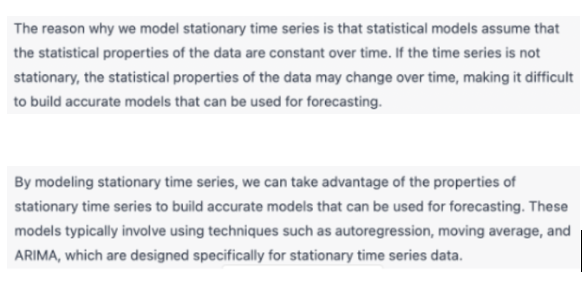

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) that can be used for time series analysis and prediction. Unlike traditional time series modeling techniques like (ARIMA & SARIMA), LSTM does not explicitly require a stationary signal. However is often recommended to preprocess the data to achieve stationarity before applying LSTM or any other modeling technique, and to incorporate external features to enhance the accuracy of the predictions.

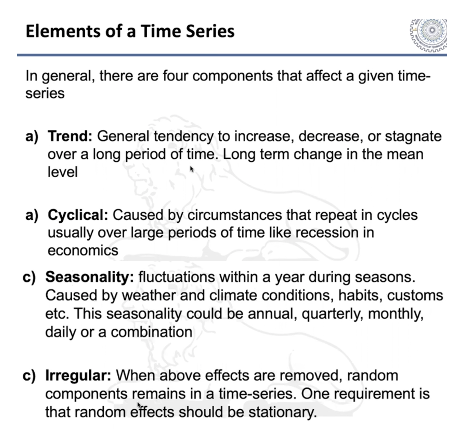

Statistics of TS is dependent on these random effects to be stationary.

## Conditions for Stationarity

Mean constant over time and Autocorrelation only depends on lag & not on pdf.

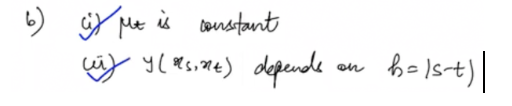

# Elements of a Time Series

## <font color=blue>
    
    1. Trend, 
    2. Seasonality, 
    3. Cycle, 
    4. Irregular Components of Time Series
    

- In Time Series we would want to understand the trend, seasonality and any long term cycles. When we remove these effects trend, seasonality and any long term cycles we are left with the Irregular component of Time Series. 

- Irregular part is what we want to model cz we have already identified what is trend, seasonality & cyclical effects. If we can understand this Irregular behaviour as well then we will be able to understand whole ts completely.

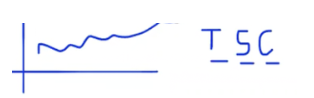

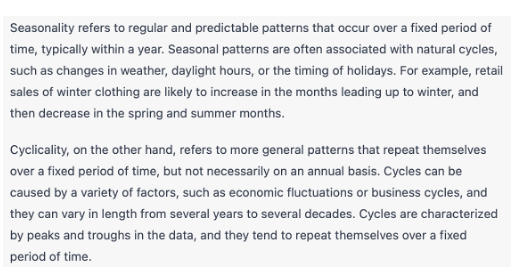

## Visualizations to identify components of time series

Looking at ACF can we call time series to be stationary or non-stationary ?

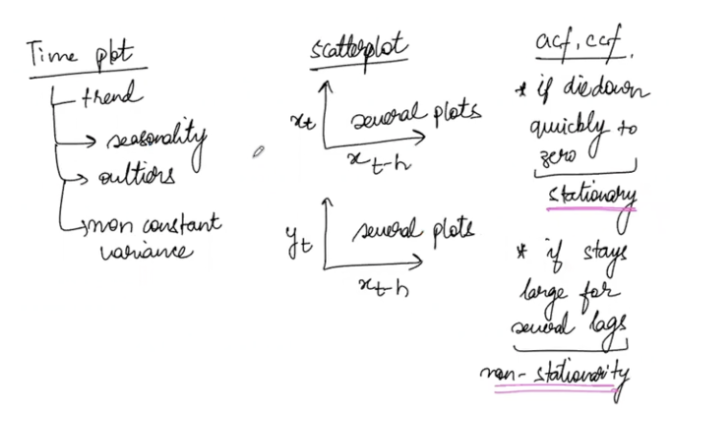

# Decomposition of Time Series Practical

### Decomposition means to understand its individual components that are there.

* How to decompose time series into different components like trends, seasons and residual components
* How to visualize these components in the form of line charts 
* How to check stationarity of time series signal using hypothesis testing

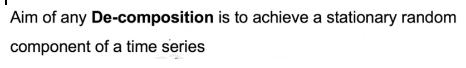

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
from statsmodels.tsa import seasonal

In [2]:
df = pd.read_csv('datasets/AirPassengers.csv')
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

We need to change Month to datetime object.

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m') 
# converting to do easy operations & show xlabels on the graph which otherwise can't be seen
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

**Time Series with Month as Index- univariate ts**

In [5]:
ts = df.set_index('Month') # Month is set as index - we need this to apply ts functions later
ts

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [6]:
type(ts)

pandas.core.frame.DataFrame

In [7]:
ts.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
ts.columns

Index(['#Passengers'], dtype='object')

**Line Plot**

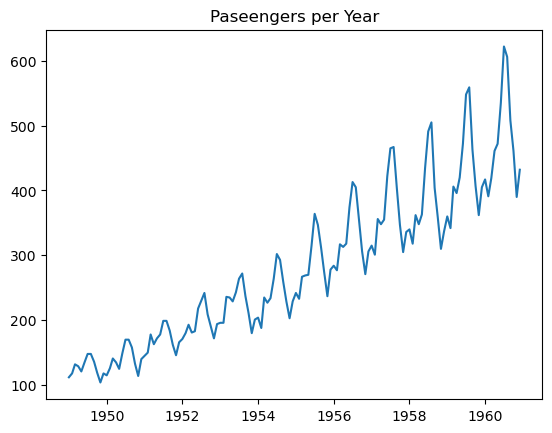

In [9]:
plt.plot(df['Month'], df['#Passengers'])
plt.title('Paseengers per Year');


* In above graph - Time series is not stationary ts because stationary ts will have constant mean and a constant variance but in this graph we see mean is a function of time itself as time is increasing, mean is also increasing
* We have an upward trend
* **Variance** in the signal is getting higher with time and seasonality (ups and downs) in the signal (by variance we are referring to fluctuations around the mean which are lower in starting & are higher towards the end of graph
    * which is coming up periodically (can see seasonlity in data, at certain times of year goes up and certain times  goes down)
    * which shows pattern 
    * which is repetitive
* <font color=blue>Since this data is not a **stationary data**, we can't go directly for **modelling** 
* We need to undestand the underlying properties of ts for which we need to remove trends, cycles, seasonality first before modelling
* <font color=blue>When we have a **non-stationary** part in the ts data, we need to **decompose** it

# Remove the trend from signal and plot - Manual process

Series = trend + stationary process. Usually we remove trend & work with residuals-stationary process). Cz understanding the residuals is what we need to know as trend is ur deterministic part, the only non-deterministic part is residuals. This residuals (irregular component of ts) behaviour we need to understand.

### Differencing Approach to remove  trend

- You take 1st value & subtract it from its previous value & u simply make a new ts. This differencing helps us to remove trend. A trend will only happen if 1 value is correlated with another value. 
- If previous value is increasing next value should also increase that is upward trend. If previous value is dec next value should also decrease that is downward trend.

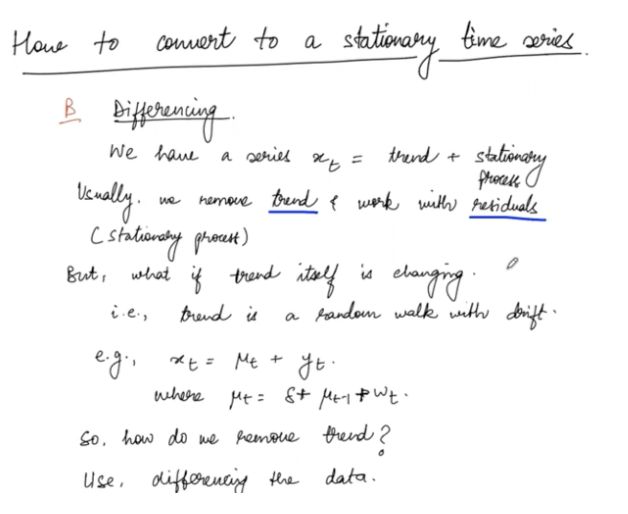

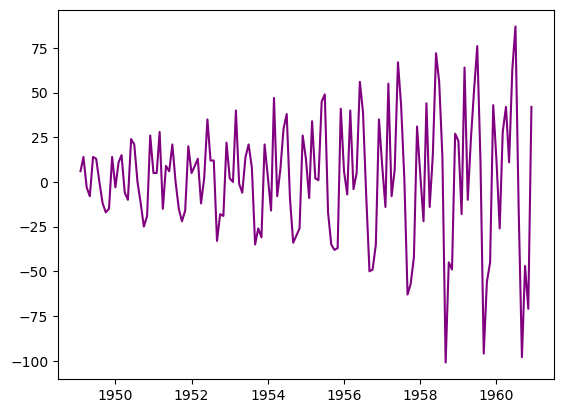

In [10]:

plt.plot(ts.diff(),color='purple');

# this will subtract the consequtive values and removes the trend from the data 

*<font color=blue>Now we see in above graph there is no trend in data but seasonality is still there*

* If we are removing trend once using ts.diff(), it is known as **integration effect order-1**
* Sometimes removing trend only once won't be helpful in which case we need to remove trend twice and thrice which will be **integration effect order-2 or order-3**

Integration effect means u r trying to difference the ts to remove the trend.

# Remove the seasonal component from the data using 'seasonal_decompose' from seasonal subpackage provided by stats model
* 'seasonal_decompose will also help in removing the trend

In [11]:
decompose_ts = seasonal.seasonal_decompose(ts, period=12, model='additive') 


* ts.to_list() - need to provide ts data as list  
* **freq=12** - providing frequency as 12 since we have monthwise info & there is a yearwise repetitive pattern (Initially we provide some freq based on our assumption, later we can also change this based on our results)
* **model='additive'**- Assuming that 'trend' + 'seasonal' + 'residual' gives observed data    There are also multiplicative models 'trend' x 'seasonal' x 'residual' present. Generally we work with additive models.

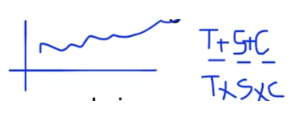

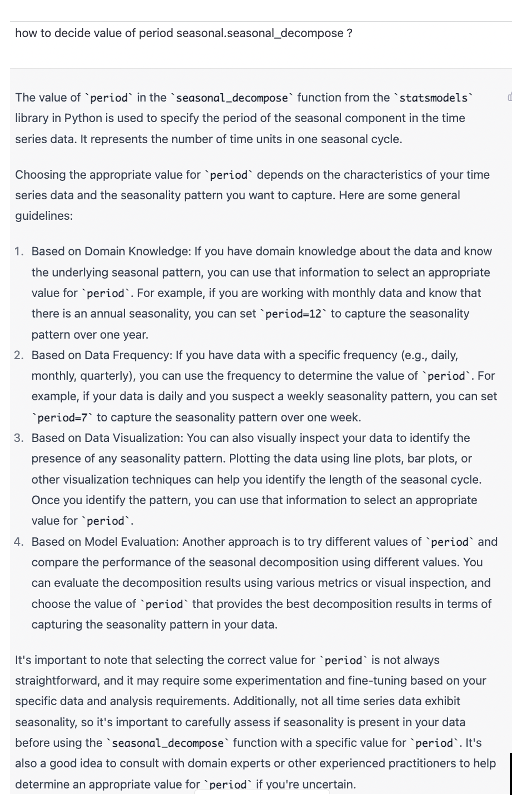

### *Note*
- Trend, Seasonality, Cyclicity are deterministic parts that's y we r able to remove it. So you remove whichever deterministic part present in ts and u r left with residual part. So whole ts is based on understanding the properties of this residual that is left. If u can model this residual, this residual may have noise, may not have noise.


- #### <font color=blue>residual may have some component that is deterministic + some noise. So modelling the residual is what we do in time-series. As out of all components of ts - trend & seasonality & cycle is already deterministic part but the irregular part i.e. the residual is something whose properties still need to be understood to understand the complete time series.
    
    
- Now when u want to do forecast of course we will need ts with all components so after we have modelled our residual part (for which we had to initially remove the trend & seasonality to understand & model only the residual part) we can combine this modelled residual i.e irregular part of ts with trend & seasonality (deterministic part of ts) to do forecast.
    
- Now when we know all components i.e. trend/seasonality/modelled residual we will be able to forecast with some statistical confidence for next data point.
    
- So usually we 1st remove trend, seasonality, cycle part of ts then we model r residual & then we add back trend, seasonality, cycle to the residual & then we do the modeling.

# Plot the output from above step

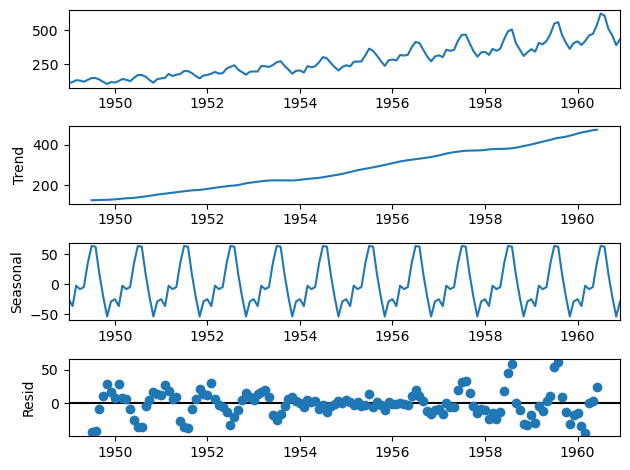

In [12]:
decompose_ts.plot();

* **Residual** - when we remove trend and seasonal values from the observed data, we get residual. Residual values may or may not look like stationary signals which we need to check using hypotheisis testing

# Extract all the components from observed data i.e. -> Trend, Seasonal, Residual

In [13]:
print('Trends:',decompose_ts.trend[:10])
print('\n')
print('Seasons:',decompose_ts.seasonal[:10])
print('\n')
print('Residuals:', decompose_ts.resid[:10])

Trends: Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64


Seasons: Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
Name: seasonal, dtype: float64


Residuals: Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: resid, dtype: float64


 *<font color=blue>The above extracted Residuals can be used for hypothesis testing to know about stationarity of the ts*

# Test for Stationary: Dickey-Fuller Test/ADF Test

### First we check our time series is stationary or not

This test is to check for any signal (not just residual) whether signal is stationary or not.By visualization of residual you may think it is constant but to quantitatively report results with a certain confidence level u need to perform statistical test.


* H0 : Signal is not stationary
* H1 : Signal is stationary

In [14]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts) # Sending whole time series
dftest

(0.8153688792060446,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

* **In Above results**
* 0.8153688792060543 - is statistic value (statistic means a certain parameter which this ADF test is using to test its hypothesis)
* 0.9918802434376411 - is pvalue (pvalue represents probability); means that p is high and H1 will be rejected

*<font color=blue>You use p-value (probability value) to interpret result, not statistic value as statistic value is just the absolute value of statistic being measured).*

*So this test shows our time series ts is not stationary, which means it does not have a constant mean & variance & it does exhibit correlations.*

# Pass the residual part to statistical test after converting to ts data and remove missing values


### Now we check if our residual is stationary or not


* H0 : Signal is not stationary
* H1 : Signal is stationary

In [15]:
dfs = adfuller(pd.Series(decompose_ts.resid).dropna()) # sending only residual part
dfs

(-5.298427587050728,
 5.516868902226411e-06,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 849.940140147128)

* pvalue = 5.516868902226235e-06(almost zero) - We can reject null hypotheisis (p is low null must go hence signal is stationary (which is accepting H1)
* **Note** - *<font color=blue>Means that residual part is stationary hence we can do ts modelling*  Stationarity has a statistical solid foundation basis on which whole time series is based. Whole time series modelling is only based on getting/extracting that stationary component.

* **Note** - *<font color=blue>If residual part is still not stationary then it would mean there are still some leftover components of trends and seasonlity which we have not extracted properly e.g. -> frequency could be wrong or we need to re-train the data*

*Note - By ADF test it is proved that since residuals are stationary they can be modelled, how they will be modelled comes later (using white noise model)*

## If not stationary how to make residuals stationary cz this is must for modelling.

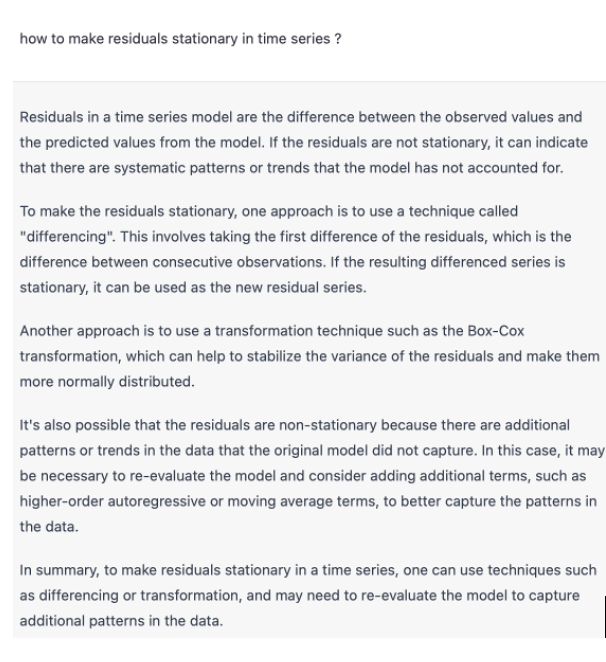

# Check scope for prediction 
* Only the stationary part of data


### *<font color=blue>Imp. Note1*

*Now we know residuals are stationary - (i.e. mean constant over time & autocorrelations depend only on lag not pdf) so residuals can be modelled as stationarity of residuals proved using ADF test. Next we need to check if there are some significant auto-correlations (correlations with lagged version) in residuals, we do that with ACF plot. If there are significant correlations means there is scope for modelling*

### <font color=blue>*Imp. Note 2*

*Now for the stationary residuals you have found through ACF plot as shown below that there r some significant correlations so u r in a position to decide on underlying time series model that can be used to fit to these residuals (e.g. white noise model) as well apart from modelling trend and seasonality*

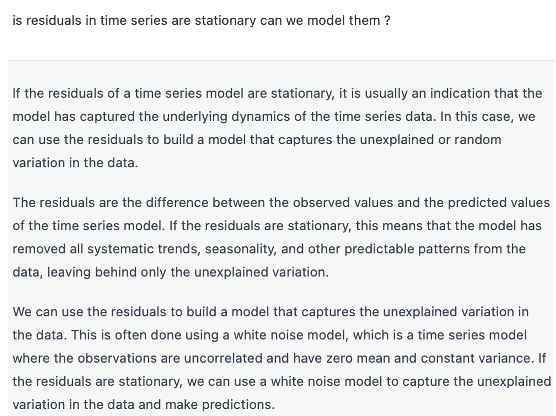

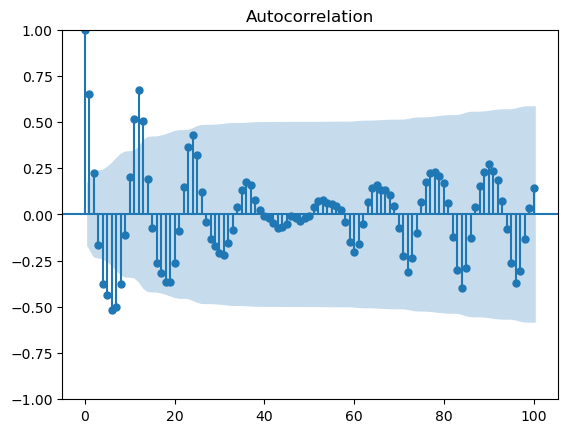

In [16]:
sm.graphics.tsa.plot_acf(pd.Series(decompose_ts.resid).dropna(), lags=100);


 * In above graph - we have many significant values which means there is scope for prediction
 * If correlations are significant (outside blue curve) there is scope for prediction. Only in initial lags we can see significant correlations, in later lags although correlations present but not statistically significant. 


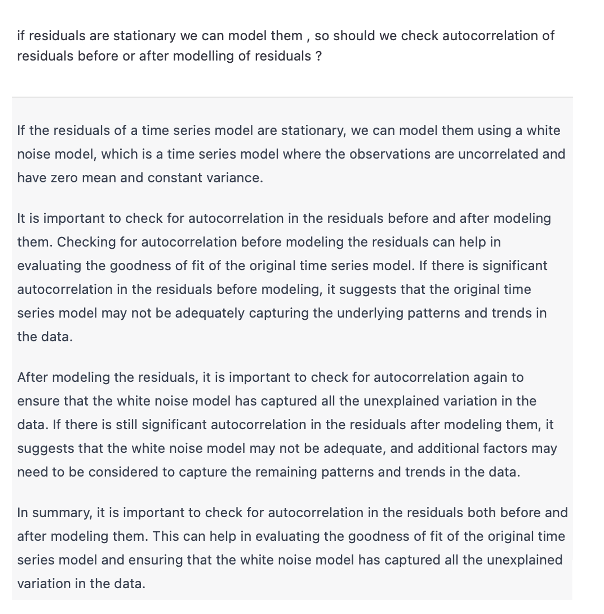

We are able to model the trend, seasonality and also now we r able to model the residuals so that it will help us to do forecasting cz we know the underlying models for all the 3 components of ts (trend, seasonality are systematic patters already, can be modelled through techniques like ARIMA) & residuals (we will be able to model now using like white noise model or like SARIMA which can do residual modelling as well).

## *Note on Modelling Trends, Seasonality & Residuals*

*<font color=blue>Modelling trends & Seasonality*

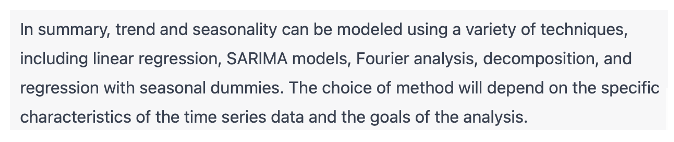

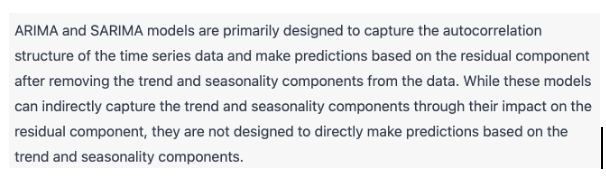

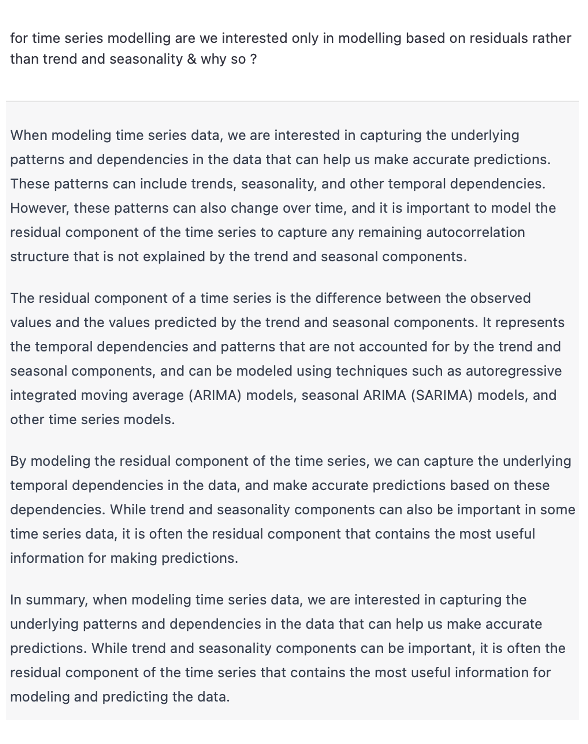

<font color=blue> **Important** This is also the reason ARMA, ARIMA and SARIMA expect stationary time series cz most important part considered for time series prediction is `modelling of residuals` which they can model and rest trend & seasonality can be modelled indirectly as stated below-

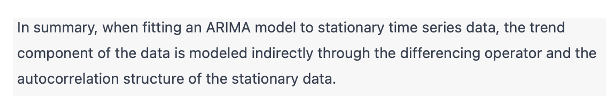
    
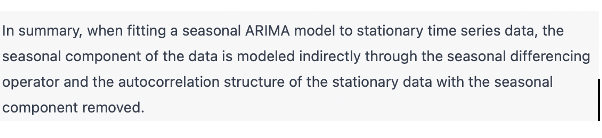

### <font color=blue>Ques - If ARIMA and SARIMA take stationary time series as input, how can they capture information about trend/seasonlity to make predictions ? 
#### *Although ARIMA/SARIMA may not be v good models for prediction to capture trend and seasonality but they are capable of giving a prediction if these components are present in time series as explained below-*

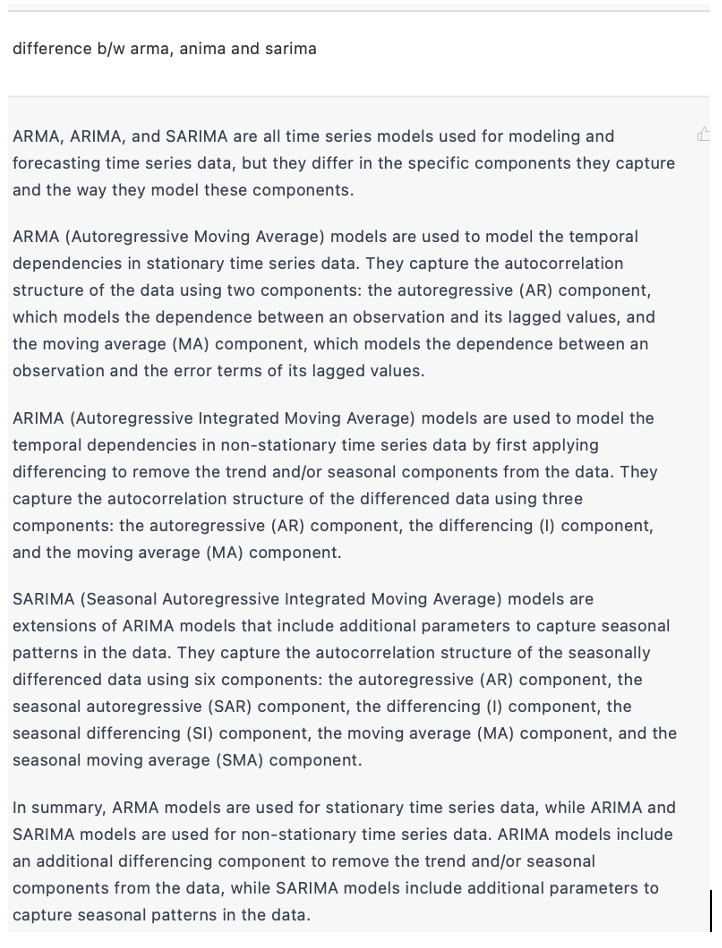

<font color=blue>*Although the trend component is removed before feeding to ARIMA but the `I component in ARIMA` which is the differencing component is kept as part of modelling so trend information can be accounted for when making prediction through ARIMA model.*

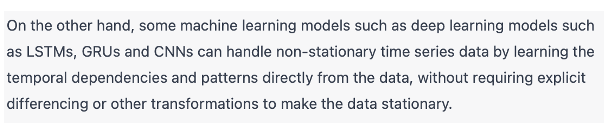

*<font color=blue>Modelling Residuals*

*In both cases whether u use White noise model (when no autocorrelations found) or ARMA model(when significant autocorrelations found), the residuals need to be stationary which can be verified using ADF test.*

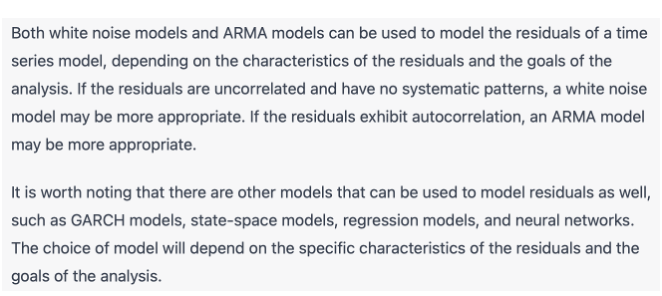

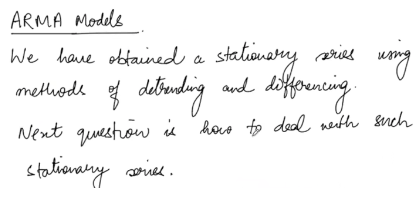


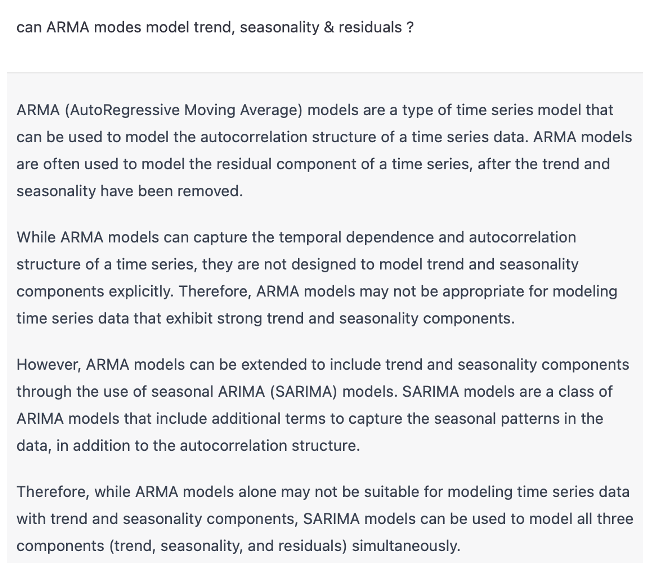

## *Note on Modelling Trends, Seasonality & Residuals seperately or single model*

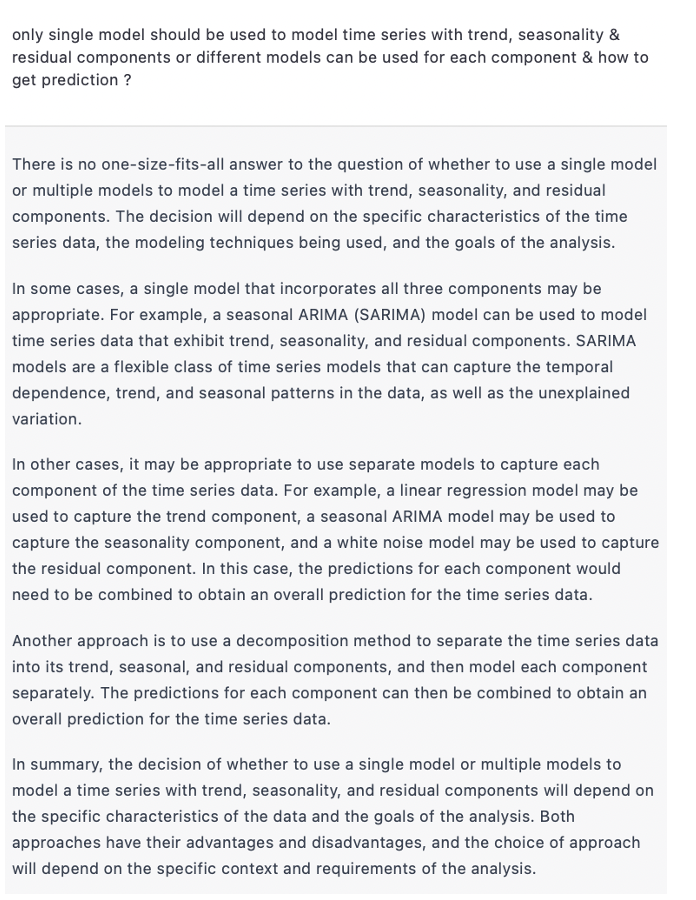

## *Note on Time Series modelling with all components vs residuals*

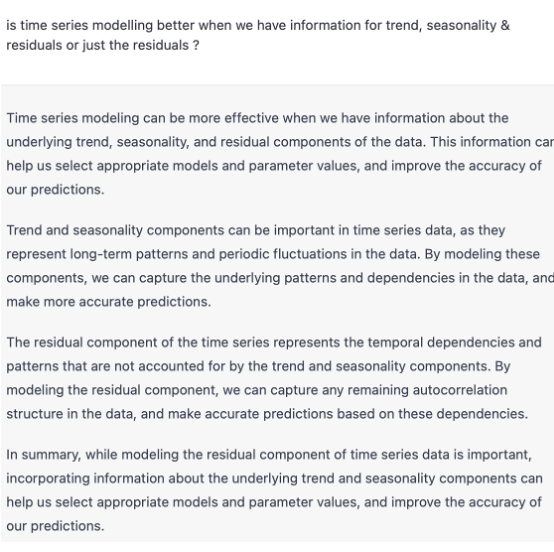

# *Statistical Time Series vs ML Time series models*

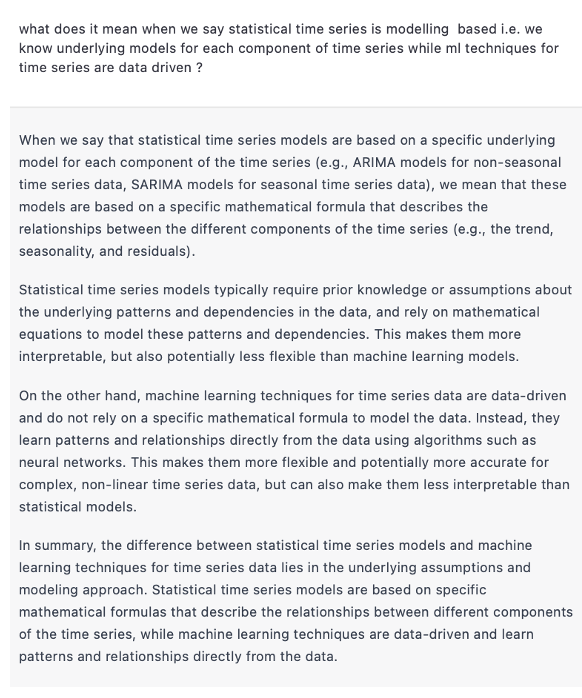

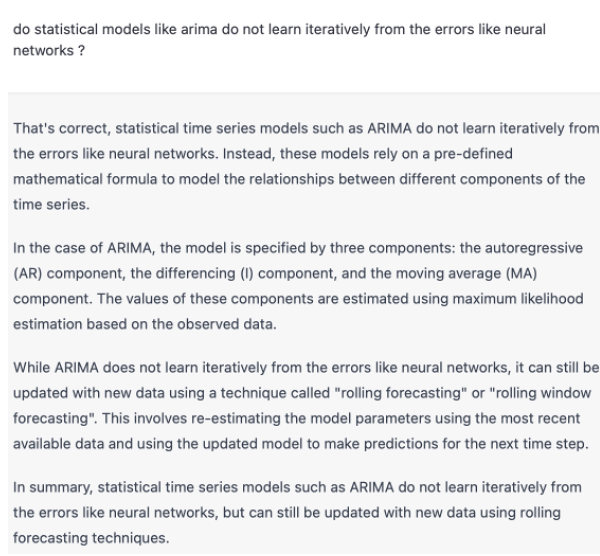